<a href="https://colab.research.google.com/github/AdarshRaj9/Kaggle-Competitions/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('train.csv')
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

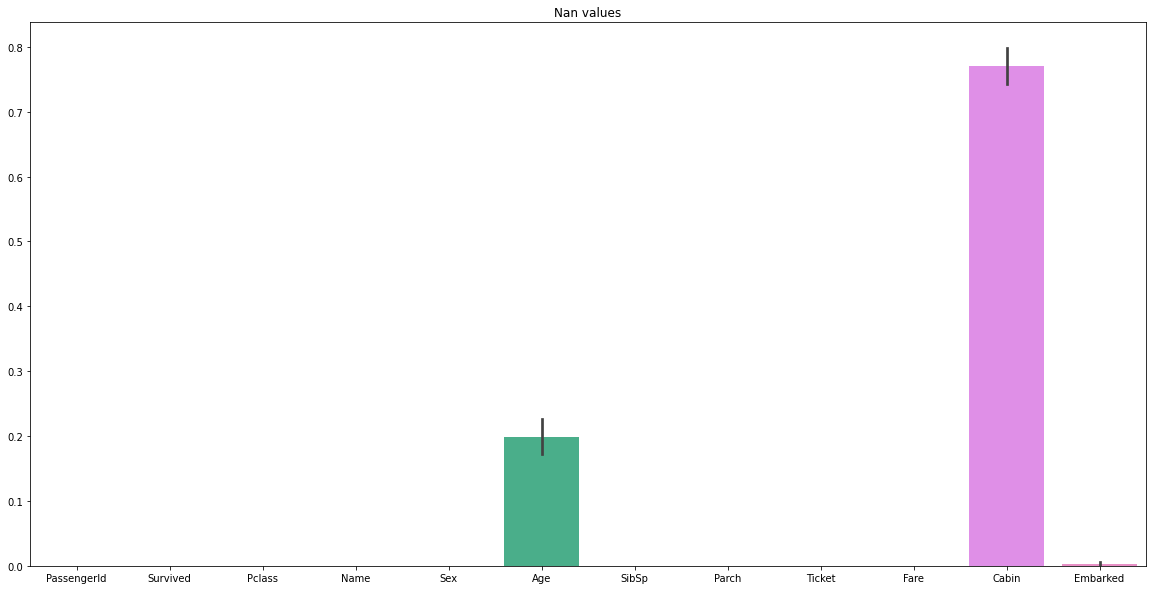

In [5]:
plt.figure(figsize=(20,10))
plt.title('Nan values')
sns.barplot(data=df.isnull())

In [83]:
#df['Age'] = df['Age'].fillna((df['Age'].mean()))


In [84]:
#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [85]:
#df=df.drop('Cabin',axis=1)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
#plt.figure(figsize=(20,10))
#plt.title('Nan values')
#sns.barplot(data=df.isnull())

In [96]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder()


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df=df.loc[df.Embarked.notna(),['Survived', 'Pclass', 'Sex', 'Embarked']]

In [9]:
df.shape

(889, 4)

In [15]:
X=df.loc[:,['Pclass']]

In [16]:
y=df['Survived']

In [17]:
X.shape
y.shape

(889,)

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg,X,y,cv=5,scoring='accuracy').mean()

0.6783406335301212

In [20]:
y.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [21]:
df.head()


,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [22]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [23]:
ohe.fit_transform(df[['Sex']])


<889x2 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [24]:
ohe.categories_


[array(['female', 'male'], dtype=object)]

In [25]:
ohe.fit_transform(df[['Embarked']])


<889x3 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [26]:
ohe.categories_


[array(['C', 'Q', 'S'], dtype=object)]

In [27]:
#Step 5: Cross-validate a Pipeline with all features¶


In [28]:
X = df.drop('Survived', axis='columns')


In [29]:
X.head()


,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [30]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer


In [31]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough')

In [32]:
# chain sequential steps together
from sklearn.pipeline import make_pipeline

In [33]:
pipe = make_pipeline(column_trans, logreg)

In [34]:
# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7727924839713071

In [35]:
# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7727924839713071

In [36]:
X_new = X.sample(5, random_state=99)
X_new

,Pclass,Sex,Embarked
599,1,male,C
512,1,male,S
273,1,male,C
215,1,female,C
790,3,male,Q


In [37]:
pipe.fit(X, y)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Sex', 'Embarked'])],
                                   verbose=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                         

In [41]:
pipe.predict(X_new)


array([1, 0, 1, 1, 0])

In [87]:
test_df1=pd.read_csv('test.csv')
test_df=test_df1
test_df.shape


(418, 11)

In [88]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
test_df=test_df.loc[test_df.Embarked.notna(),['Pclass', 'Sex', 'Embarked']]

In [91]:
test_df.shape

(418, 3)

In [92]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [93]:
ohe.fit_transform(df[['Sex']])


<889x2 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [94]:
ohe.fit_transform(df[['Embarked']])


<889x3 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [126]:
y_pred=pipe.predict(test_df)
#type(y_pred)
y_pred=pd.Series(y_pred)
#[y_pred.column='Survived'
y_pred




0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [103]:
passId=test_df1['PassengerId']
passId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [104]:
type(passId)

pandas.core.series.Series

In [105]:
passId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [106]:
output=pd.concat([passId,y_pred],axis=1)

In [120]:
output=output.rename(columns={0: "Survived"})

In [121]:
output.reset_index(drop=True, inplace=True)


In [122]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
output.to_csv('submission.csv',index=False)


In [124]:
output.shape

(418, 2)